In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel(r"D:\Downloads\Salary (1).xlsx")
data

,Experience,Salary
0,1.0,34000
1,1.5,35900
2,1.6,34000
3,2.0,42579
4,1.7,33990
5,1.5,34000
6,2.2,43000
7,2.7,42500
8,1.1,30000
9,2.9,45900


In [4]:
data.shape

(22, 2)

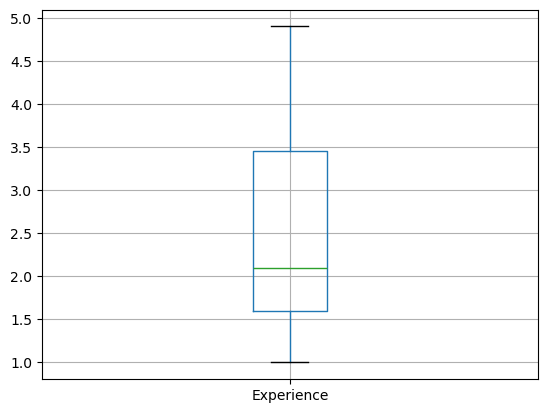

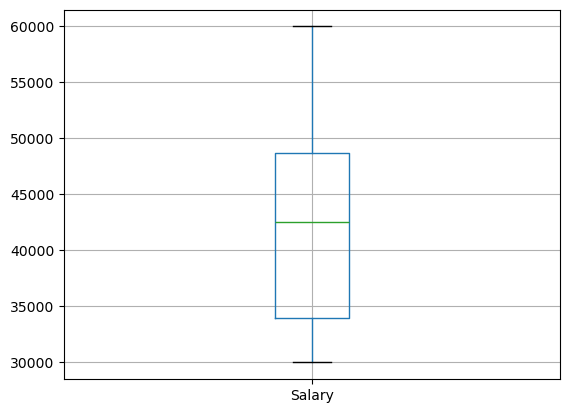

In [5]:
# asumption 1: there should be no outlier in the data.
# check using boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

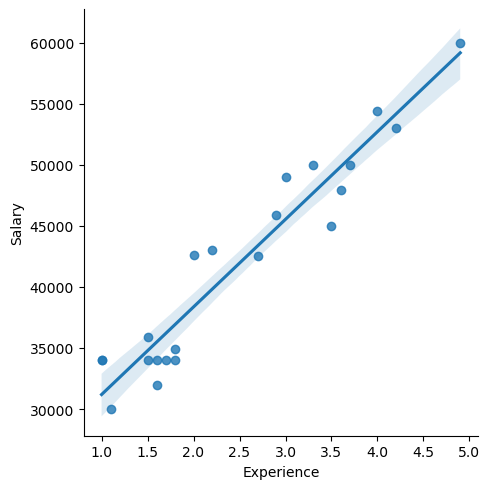

In [6]:
# assumption 2: assumption of linearity:every ind var should have a
# linear relationship with the dep var.

sns.lmplot(data=data,x='Experience',y='Salary')
plt.show();

##### data spliting

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
y

0     34000
1     35900
2     34000
3     42579
4     33990
5     34000
6     43000
7     42500
8     30000
9     45900
10    34900
11    32000
12    34000
13    34000
14    49000
15    50000
16    49990
17    54390
18    53000
19    45000
20    47900
21    60000
Name: Salary, dtype: int64

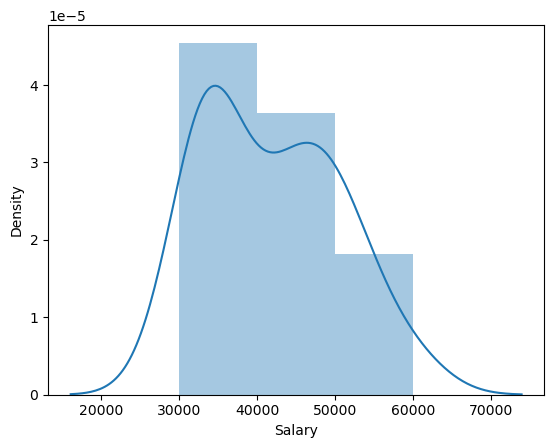

In [9]:
# 3.assumption of normality: the dependent variable should an approximate disttribtion
sns.distplot(y)
plt.show()

In [17]:
# splitting the dataset into travinig and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 1/3,random_state=0)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(8, 1)
(14,)
(8,)


In [19]:
# fitting the simple linear regression model to the training dataset
from sklearn.linear_model import LinearRegression
# create a model object
lm= LinearRegression()
# train the model object
lm.fit(x_train,y_train) # input

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

24892.03664235489
[7077.8263528]


In [20]:
 # linear regresion se sellery ka prediction
x1=10
ypred=24892.03664235489 +(7077.8263528*x1)
ypred

95670.3001703549

In [21]:
# prediction of test and training set result
y_pred=lm.predict(x_test)
x_pred=lm.predict(x_train)

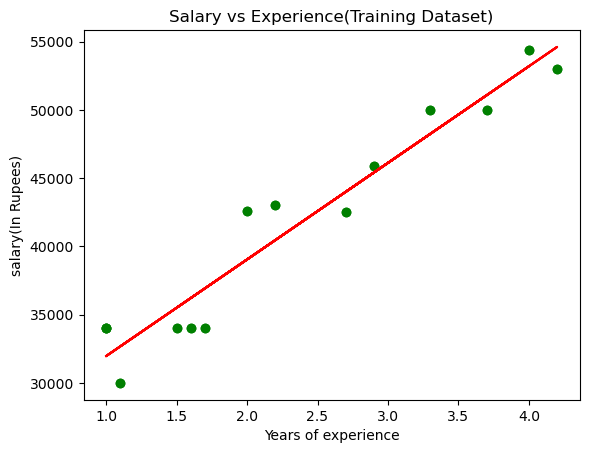

In [23]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,x_pred,color="red")
plt.title("Salary vs Experience(Training Dataset)")
plt.xlabel("Years of experience")
plt.ylabel("salary(In Rupees)")
plt.show()

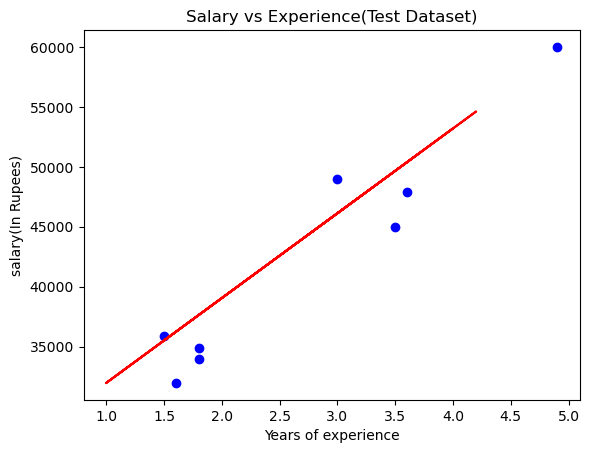

In [24]:
# visualizing the test set results
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,x_pred,color="red")
plt.title("Salary vs Experience(Test Dataset)")
plt.xlabel("Years of experience")
plt.ylabel("salary(In Rupees)")
plt.show()

In [29]:
import pandas as pd

# creating a datframe with x_test,y_test,and y_pred
result_df=pd.DataFrame({'Experience':x_test.squeeze(),'Actual Salary': y_test,'Predicted Salary': y_pred})
result_df=result_df.reset_index(drop="index")
result_df

,Experience,Actual Salary,Predicted Salary
0,3.6,47900,50372.211512
1,1.8,34900,37632.124077
2,3.0,49000,46125.515701
3,1.8,34000,37632.124077
4,1.5,35900,35508.776172
5,4.9,60000,59573.385771
6,1.6,32000,36216.558807
7,3.5,45000,49664.428877


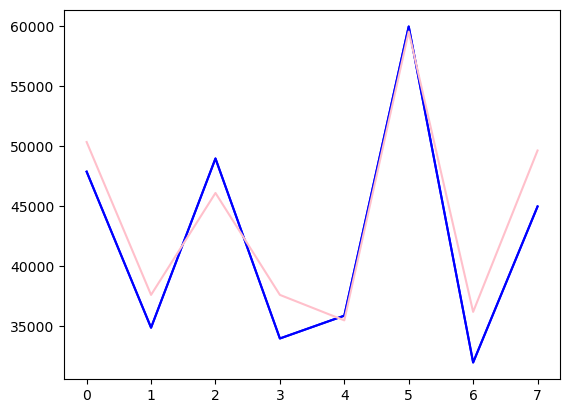

In [33]:
result_df["Actual Salary"].plot(color="blue")
result_df["Predicted Salary"].plot(color="pink")
plt.show()

In [35]:
result_df["Residual"]=result_df["Actual Salary"]-result_df["Predicted Salary"]
result_df

,Experience,Actual Salary,Predicted Salary,Residual
0,3.6,47900,50372.211512,-2472.211512
1,1.8,34900,37632.124077,-2732.124077
2,3.0,49000,46125.515701,2874.484299
3,1.8,34000,37632.124077,-3632.124077
4,1.5,35900,35508.776172,391.223828
5,4.9,60000,59573.385771,426.614229
6,1.6,32000,36216.558807,-4216.558807
7,3.5,45000,49664.428877,-4664.428877


In [38]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.8877894624797882


In [44]:
# test data---> unseen data
test=pd.DataFrame({"Experience":[2.5,6,0,1,1.8,3]})
test

,Experience
0,2.5
1,6.0
2,0.0
3,1.0
4,1.8
5,3.0


In [45]:
y_new=lm.predict(test)
y_new

array([42586.60252435, 67358.99475914, 24892.03664235, 31969.86299515,
       37632.12407739, 46125.51570075])